In [1]:
import pandas as pd
import sys
# Load median_forecast from Task 3
import numpy as np


In [2]:
# Import the portfolio optimization module

sys.path.append("../scripts")


from portfolio_optimization import (
   
    load_historical_data,

    forecast_prices,
    optimize_portfolio,
    plot_portfolio_performance
)

In [3]:
# Load historical data
tsla_data = load_historical_data("TSLA")  # Uses cleaned_tesla.csv
bnd_data = load_historical_data("BND")
spy_data = load_historical_data("SPY")

# Check if data was loaded successfully
if tsla_data is None or bnd_data is None or spy_data is None:
    raise FileNotFoundError("One or more data files are missing. Please check the data folder.")

# Ensure the 'Close' column exists in all datasets
if 'Close' not in tsla_data.columns or 'Close' not in bnd_data.columns or 'Close' not in spy_data.columns:
    raise ValueError("The 'Close' column is missing in one or more datasets.")

# Combine data into a single DataFrame
combined_data = pd.DataFrame({
    'TSLA': tsla_data['Close'],
    'BND': bnd_data['Close'],
    'SPY': spy_data['Close']
}, index=tsla_data.index)

# Display the combined data
print(combined_data.head())

Number of columns in TSLA_data.csv: 6
Number of columns in BND_data.csv: 6
Number of columns in SPY_data.csv: 6
                 TSLA        BND         SPY
Date                                        
2015-01-05  14.433333  62.777518  171.702356
2015-01-06  14.280000  63.125810  170.316050
2015-01-07  14.318667  63.050050  170.316116
2015-01-08  14.253333  62.921385  173.206165
2015-01-09  13.998667  63.057630  173.424635


In [4]:
# Load the forecasted TSLA prices
tsla_forecast = np.load("../data/median_forecast.npy") 

In [5]:
# Load the forecasted TSLA prices from Task 3
tsla_forecast = np.load("../data/median_forecast.npy")  

# Forecast prices for BND and SPY
forecast_df = forecast_prices(combined_data, tsla_forecast)
print(forecast_df.head())

                  TSLA        BND         SPY
2025-01-31  414.929290  72.298716  606.925105
2025-02-03  415.087646  72.303055  607.250408
2025-02-04  413.795597  72.307393  607.575886
2025-02-05  413.474829  72.311733  607.901538
2025-02-06  413.939437  72.316072  608.227364


In [10]:
# Optimize portfolio
optimal_weights, portfolio_return, portfolio_volatility, sharpe_ratio, var_95 = optimize_portfolio(forecast_df)

# Display results
print("Optimal Weights:", optimal_weights)
print("Portfolio Return:", portfolio_return)
print("Portfolio Volatility:", portfolio_volatility)
print("Sharpe Ratio:", sharpe_ratio)
print("Value at Risk (95%):", var_95)

Optimal Weights: [1.52267088e-13 0.00000000e+00 1.00000000e+00]
Portfolio Return: 0.13507197387009928
Portfolio Volatility: 3.69093912866533e-05
Sharpe Ratio: 3659.555716350767
Value at Risk (95%): 0.0005321007488534756


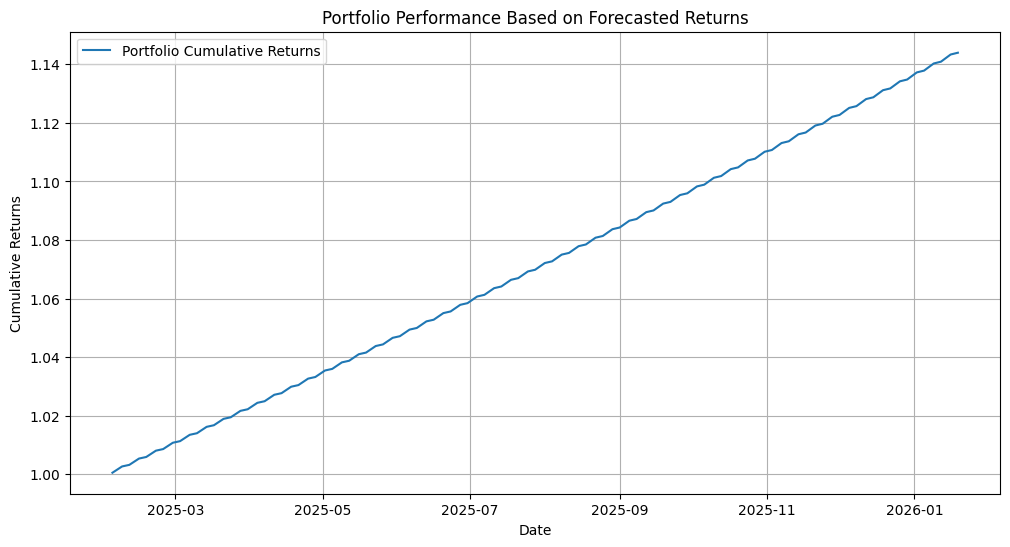

In [11]:
plot_portfolio_performance(forecast_df, optimal_weights)

In [12]:
# Print results
print(f"""
** Optimized Portfolio Allocation **
- TSLA: {optimal_weights[0]:.2%}
- BND: {optimal_weights[1]:.2%}
- SPY: {optimal_weights[2]:.2%}

** Portfolio Metrics **
- Expected Annual Return: {portfolio_return:.2%}
- Annual Volatility: {portfolio_volatility:.2%}
- Sharpe Ratio: {sharpe_ratio:.2f}
- Value at Risk (95%): {var_95:.2%}
""")


** Optimized Portfolio Allocation **
- TSLA: 0.00%
- BND: 0.00%
- SPY: 100.00%

** Portfolio Metrics **
- Expected Annual Return: 13.51%
- Annual Volatility: 0.00%
- Sharpe Ratio: 3659.56
- Value at Risk (95%): 0.05%

